# Gender Classification by Voice using KNN

dataset source : https://www.kaggle.com/datasets/primaryobjects/voicegender

Regressors: 
* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental Freq. divided by the frequency range
* label: male or female

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

# Preparing the Data

In [2]:
df = pd.read_csv(r'D:\Projects\Gender Recognition by voice\voice.csv')
df.head()
target = 'label'

In [63]:
# Factorizing the Gender to Male = 0, and Female = 1
df[target] = pd.factorize(df[target])[0]

# Insights on the Data

In [4]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


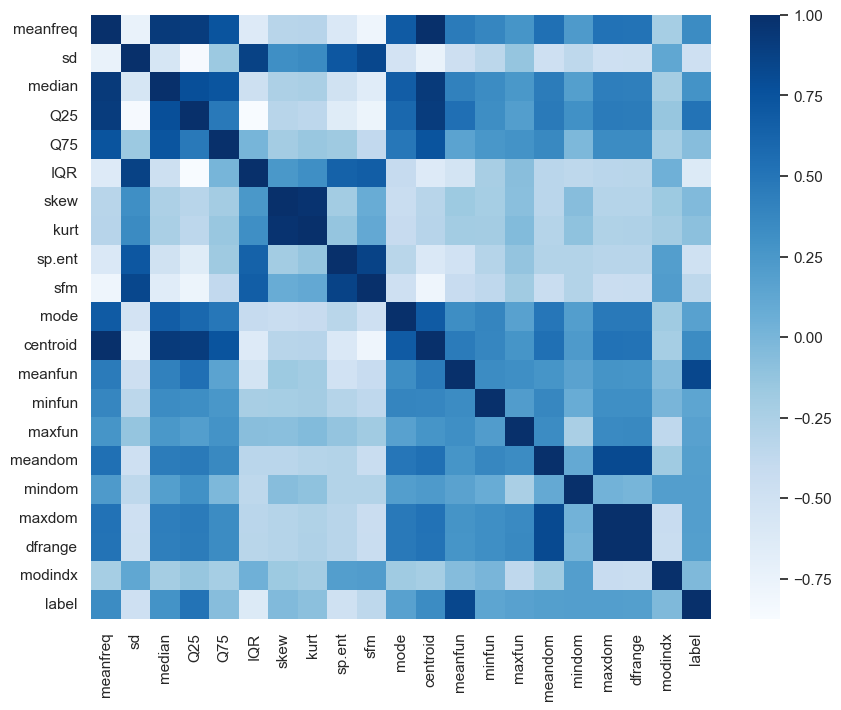

In [67]:
# sets the style to "darkgrid" and the color palette to "muted" as default
sb.set(style="darkgrid", palette="muted")

corr_matrix = df.corr()
# heatmap of correlation matrix
plt.figure(figsize=(10,8), dpi= 100)
sb.heatmap(corr_matrix, cmap='Blues')
plt.show()


Text(0, 0.5, 'Features')

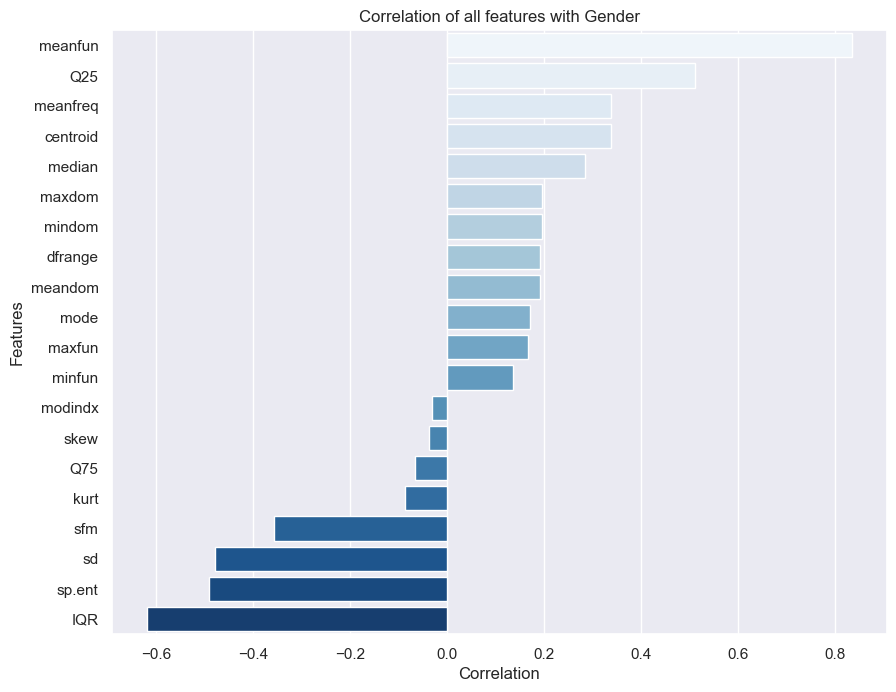

In [6]:
# All Regressors (Features) in one Data Frame
subset_df = df.drop(columns=[target])

# Correlation Matrix for Gender Vs. all Features
corr_matrix2 = subset_df.corrwith(df[target])
corr_matrix2 = corr_matrix2.sort_values(ascending=False)

# Bar Plot for Correlation
plt.figure(figsize=(10,8), dpi= 100)
sb.barplot(x=corr_matrix2.values, y=corr_matrix2.index, palette='Blues')

# set title and labels
plt.title(f'Correlation of all features with {"Gender"}')
plt.xlabel('Correlation')
plt.ylabel('Features')

# Visualization

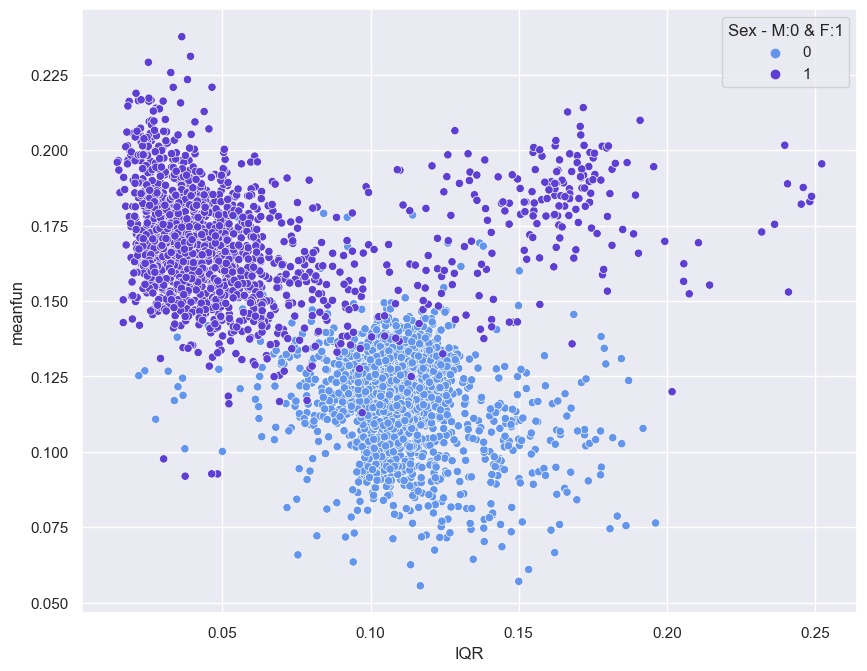

In [103]:
palette  = sb.color_palette(["#6495ED", "#5D3FD3"])
categories = ['male', 'female']
plt.figure(figsize=(10,8), dpi= 100)

sb.scatterplot(x = "IQR", y = "meanfun" , 
               hue = target,
              data = df, palette = palette )

plt.legend(title='Sex - M:0 & F:1');

# Train/Test Split

train_test_split(X, y, test_size=0.3) shuffles the data automatically
the stratify parameter ensures that the split has equal proportions of each target lable (i.e. Male/Female)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df[['meanfun', 'IQR']], df[target],
                                                test_size = 0.1, stratify = df[target] )

# Trainning

By default, the decision for a tie will return the label with least index, (i.e., if there is a tie gender will be 0 (female) because 0 is the lowest). However, if the weights is set to 'distance' , it will take the nearest neighbor as the tie breaker 

In [30]:
knn = KNeighborsClassifier(n_neighbors = 5 , weights = 'uniform')
#knn.get_params()
knn.fit(x_train,y_train);

# Prelimanry Evaluation

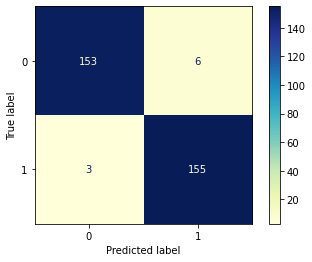

In [37]:
y_test_pred = knn.predict(x_test)
# Removing the seaborn visualization removes the white lines that come with it.
sb.reset_orig()

# Create a confusion matrix
plot_confusion_matrix(knn, x_test, y_test, cmap='YlGnBu')

In [102]:
# Print the classifcation report
print(classification_report(y_test, y_test_pred, target_names = ['Male(0)', 'Female(1)']))

              precision    recall  f1-score   support

     Male(0)       0.98      0.96      0.97       159
   Female(1)       0.96      0.98      0.97       158

    accuracy                           0.97       317
   macro avg       0.97      0.97      0.97       317
weighted avg       0.97      0.97      0.97       317



# Enhancing Accuracy - GridSearch CV

In [88]:
parameters = {'n_neighbors':range(1, 20), 
              'weights':['uniform', 'distance']}

In [49]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters, scoring = 'accuracy')

grid_search.fit(x_train, y_train);

In [50]:
grid_search.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [44]:
grid_search.best_score_

0.9729935170676253

# Retraining 

In [45]:
knn = KNeighborsClassifier(n_neighbors = 9 , weights = 'distance')
knn.fit(x_train,y_train);

# Evaluation

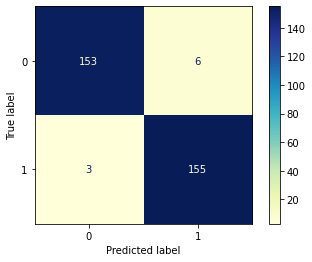

In [51]:
y_test_pred = knn.predict(x_test)
sb.reset_orig()

# Create a confusion matrix
plot_confusion_matrix(knn, x_test, y_test, cmap='YlGnBu')

In [52]:
# Print the classifcation report
print(classification_report(y_test, y_test_pred, target_names = ['Male(0)', 'Female(1)']))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       159
           1       0.96      0.98      0.97       158

    accuracy                           0.97       317
   macro avg       0.97      0.97      0.97       317
weighted avg       0.97      0.97      0.97       317

